# TITANIC DATASET


**AUTHOR- RAHUL JANGRA**

In [64]:
#import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib

In [5]:
#loading/Reading the dataset

df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Checking the null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

In [8]:
#Dropping the cabin column because of large no. of null values.

df=df.drop(['Cabin'], axis=1)

In [33]:
un=['PassengerId','Name']
for i in un:
    df.drop(i,axis=1,inplace=True)

In [9]:
df.shape

(891, 11)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

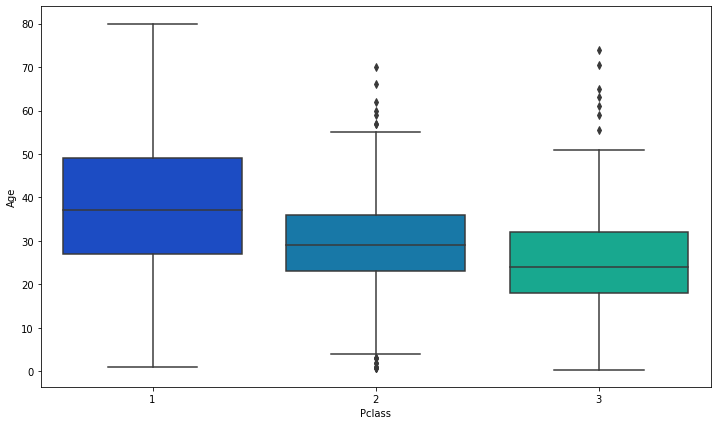

In [11]:
#Trying to fill the null values in age column by checking the relation with Pclass variable or column.

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

Average age of Pclass 1 passenger is 37 , Pclass 2 - 29, Pclass 3 - 24. So, we'll fill accordingly.

In [12]:
#defining the function to fill the null values.

def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
        

In [13]:
#Now apply the function.

df['Age']= df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
#Trying to fill the values in Embarked column by checking the more detail about this column .

df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
# Checking the categories in Embarked column

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Out of 891 , S is appearing 644 times , so we can fill the null values with 'S'.

df.Embarked.fillna('S', inplace= True)
df.Embarked.isnull().sum()

0

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

**To check the no. of passengers survived or died in the accident.**

Out of 891 62 people died in the accident


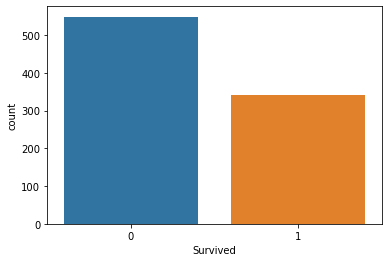

In [19]:
sns.countplot(df['Survived'])

death_percent= round((df['Survived'].value_counts().values[0]/891)*100)

print('Out of 891 {} people died in the accident'.format(death_percent))

**To check the survival ratio between male & female**

<AxesSubplot:xlabel='Survived', ylabel='count'>

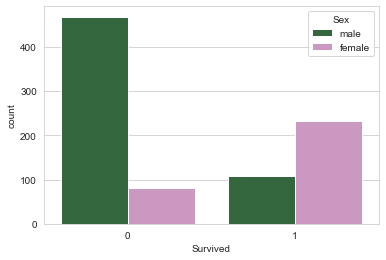

In [20]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue='Sex', data=df, palette='cubehelix')

**To check the survival rate by Pclass**

<AxesSubplot:xlabel='Survived', ylabel='count'>

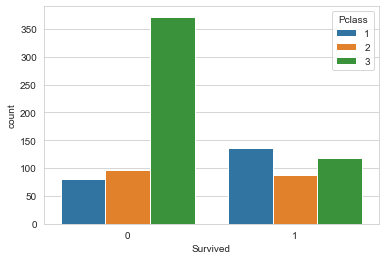

In [21]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue='Pclass', data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

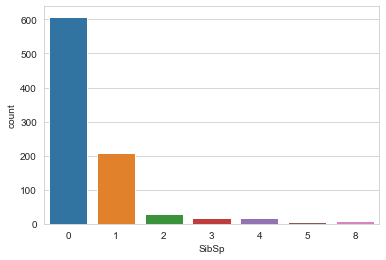

In [22]:
sns.countplot(x='SibSp', data=df)

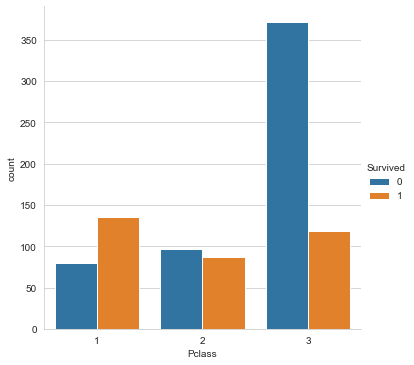

In [23]:
sns.catplot(x="Pclass",hue="Survived",
kind="count",data=df)

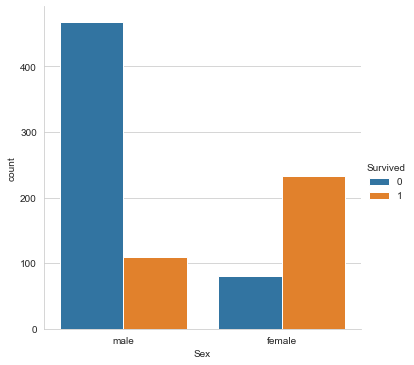

In [26]:
sns.catplot(x="Sex",hue="Survived",
kind="count",data=df)


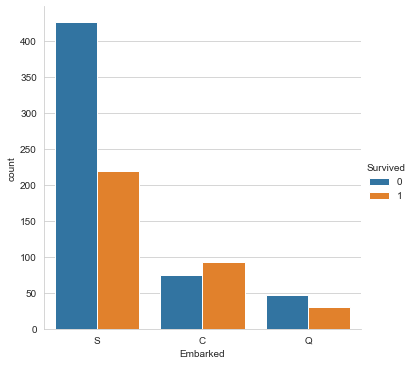

In [28]:
sns.catplot(x="Embarked",hue="Survived",kind="count",data=df)

In [29]:
df.drop("Ticket",axis=1,inplace=True)

In [24]:
# Now, we'll combine the two columns 

df['family_size']= df['Parch']+df['SibSp']
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size'],
      dtype='object')

In [25]:
df.drop(['Parch','SibSp'], axis=1, inplace= True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'family_size'],
      dtype='object')

In [30]:
df.shape

(891, 9)

**Conclusion:** 
    
    1. 62% People died in the accident.
    2. Female survived more than males.
    3. No. of passenger died in Pclass 3 was more as comapre to others.

    

## Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['Sex','Embarked']
for i in cat:
    df[i]=le.fit_transform(df[i])

In [34]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


### Correlation

In [37]:
df_corr=df.corr()
df_corr

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
Survived,1.000000,-0.338481,-0.543351,-0.047255,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.408487,-0.549500,0.162098,0.065997
Sex,-0.543351,0.131900,1.000000,0.078421,-0.182333,0.108262,-0.200988
Age,-0.047255,-0.408487,0.078421,1.000000,0.123784,-0.011245,-0.251918
Fare,0.257307,-0.549500,-0.182333,0.123784,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,0.108262,-0.011245,-0.224719,1.000000,0.066516
family_size,0.016639,0.065997,-0.200988,-0.251918,0.217138,0.066516,1.000000


<AxesSubplot:>

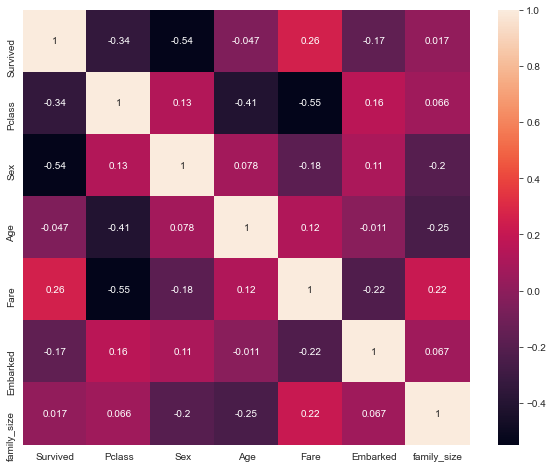

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot= True)

## Outliers

<AxesSubplot:>

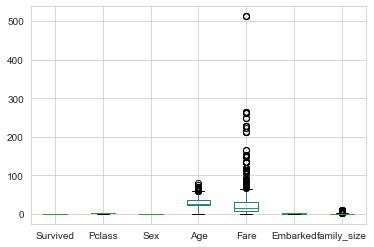

In [40]:
# outlier with boxplot
df.boxplot()

Survived          AxesSubplot(0.125,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Fare           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Embarked       AxesSubplot(0.789286,0.536818;0.110714x0.343182)
family_size          AxesSubplot(0.125,0.125;0.110714x0.343182)
dtype: object

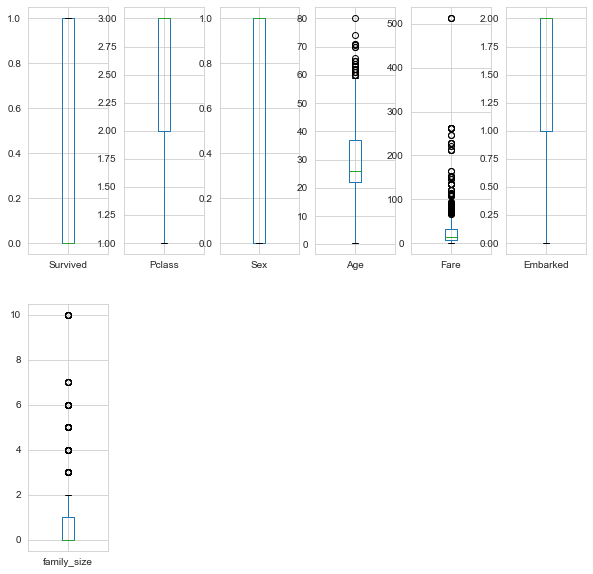

In [41]:
#plot the each column individually with sns.subplot for getting more clearance about the outlier

df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

There are many outliers in fare, age , family size.

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [43]:
df_final=df[(z<3).all(axis=1)]
df_final.shape

(839, 7)

In [44]:
df.shape

(891, 7)

In [46]:
collist=df.columns.values
ncol=12
nrows=10

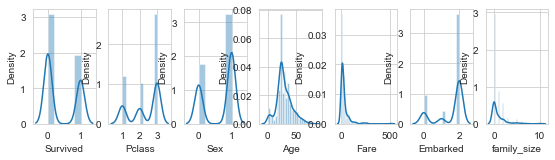

In [49]:
#checking the skewness of data
plt.figure(figsize=(16,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

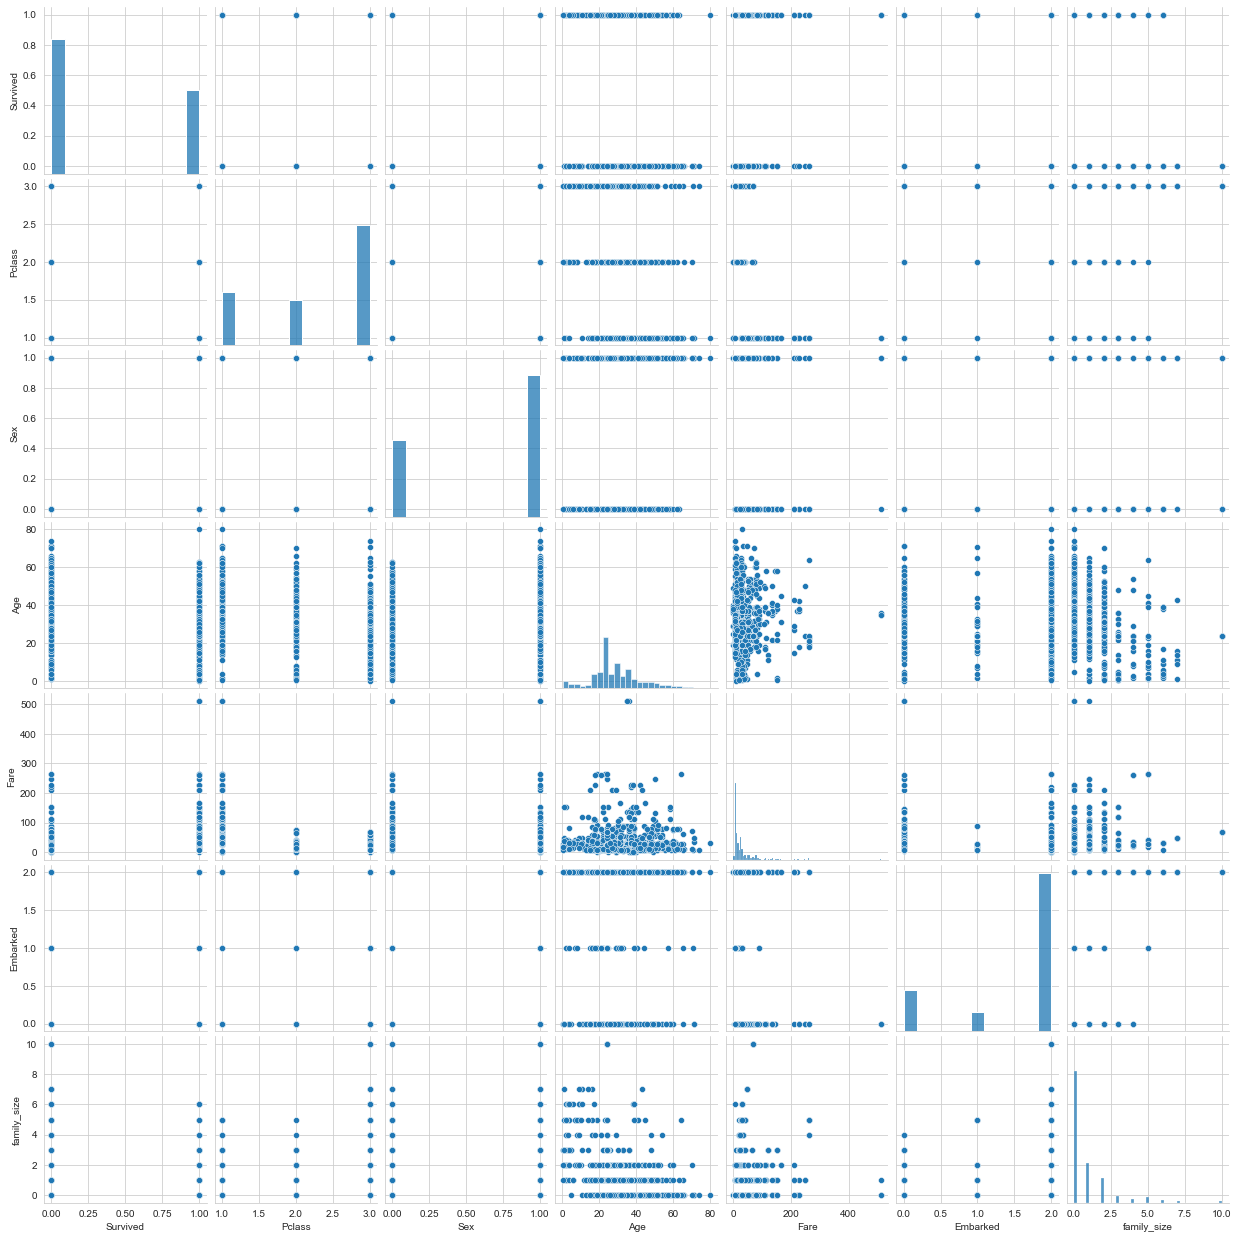

In [48]:
sns.pairplot(df)

In [50]:
#separating target and input variables
df_x=df_final.drop(columns=["Survived"])
y=df_final[["Survived"]]

In [51]:

#scaling the imput variable

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.metrics import accuracy_score

def max_accuracy_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=accuracy_score(y_test,y_pred)
        print("accuracyscore corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [53]:
def kfold(clf,x,y,):
    print("Mean roc auccuracy score for",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean())
    print("standard deviation inaccuracy_scoref or",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").std())
    print(cross_val_score(clf,x,y,cv=5,scoring="accuracy"))

In [56]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
lg_clsf=LogisticRegression()
max_accuracy_score(lg_clsf,x,y)

accuracyscore corresponding to  42  is  0.7738095238095238
accuracyscore corresponding to  43  is  0.7857142857142857
accuracyscore corresponding to  44  is  0.7916666666666666
accuracyscore corresponding to  45  is  0.8154761904761905
accuracyscore corresponding to  46  is  0.7738095238095238
accuracyscore corresponding to  47  is  0.8154761904761905
accuracyscore corresponding to  48  is  0.7976190476190477
accuracyscore corresponding to  49  is  0.8214285714285714
accuracyscore corresponding to  50  is  0.8154761904761905
accuracyscore corresponding to  51  is  0.8452380952380952
accuracyscore corresponding to  52  is  0.7678571428571429
accuracyscore corresponding to  53  is  0.7738095238095238
accuracyscore corresponding to  54  is  0.8035714285714286
accuracyscore corresponding to  55  is  0.8095238095238095
accuracyscore corresponding to  56  is  0.8095238095238095
accuracyscore corresponding to  57  is  0.8095238095238095
accuracyscore corresponding to  58  is  0.81547619047619

65

In [57]:
kfold(lg_clsf,x,y)

Mean roc auccuracy score for LogisticRegression() 0.7962004562303964
standard deviation inaccuracy_scoref or LogisticRegression() 0.00921610809148141
[0.78571429 0.80357143 0.78571429 0.79761905 0.80838323]


In [58]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,50)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 5}

In [59]:
knn=KNeighborsClassifier(n_neighbors=13)
max_accuracy_score(knn,x,y)

accuracyscore corresponding to  42  is  0.7738095238095238
accuracyscore corresponding to  43  is  0.8154761904761905
accuracyscore corresponding to  44  is  0.8154761904761905
accuracyscore corresponding to  45  is  0.8333333333333334
accuracyscore corresponding to  46  is  0.7797619047619048
accuracyscore corresponding to  47  is  0.8154761904761905
accuracyscore corresponding to  48  is  0.8273809523809523
accuracyscore corresponding to  49  is  0.8273809523809523
accuracyscore corresponding to  50  is  0.8214285714285714
accuracyscore corresponding to  51  is  0.8035714285714286
accuracyscore corresponding to  52  is  0.8154761904761905
accuracyscore corresponding to  53  is  0.7976190476190477
accuracyscore corresponding to  54  is  0.8035714285714286
accuracyscore corresponding to  55  is  0.8154761904761905
accuracyscore corresponding to  56  is  0.8035714285714286
accuracyscore corresponding to  57  is  0.8035714285714286
accuracyscore corresponding to  58  is  0.80357142857142

65

In [60]:
kfold(knn,x,y)

Mean roc auccuracy score for KNeighborsClassifier(n_neighbors=13) 0.8104932991160536
standard deviation inaccuracy_scoref or KNeighborsClassifier(n_neighbors=13) 0.013184372093079082
[0.83333333 0.80952381 0.79761905 0.79761905 0.81437126]


In [65]:
parameters={"n_estimators":[10,50,100,150,200,250,300,350,400,450,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [66]:
rf_clf=RandomForestClassifier(n_estimators=50)
max_accuracy_score(rf_clf,x,y)

accuracyscore corresponding to  42  is  0.7619047619047619
accuracyscore corresponding to  43  is  0.8154761904761905
accuracyscore corresponding to  44  is  0.8214285714285714
accuracyscore corresponding to  45  is  0.8392857142857143
accuracyscore corresponding to  46  is  0.7619047619047619
accuracyscore corresponding to  47  is  0.8333333333333334
accuracyscore corresponding to  48  is  0.8035714285714286
accuracyscore corresponding to  49  is  0.8392857142857143
accuracyscore corresponding to  50  is  0.8154761904761905
accuracyscore corresponding to  51  is  0.8333333333333334
accuracyscore corresponding to  52  is  0.7857142857142857
accuracyscore corresponding to  53  is  0.8095238095238095
accuracyscore corresponding to  54  is  0.7619047619047619
accuracyscore corresponding to  55  is  0.8214285714285714
accuracyscore corresponding to  56  is  0.8035714285714286
accuracyscore corresponding to  57  is  0.8273809523809523
accuracyscore corresponding to  58  is  0.79166666666666

98

In [67]:
kfold(rf_clf,x,y)

Mean roc auccuracy score for RandomForestClassifier(n_estimators=50) 0.8009980039920158
standard deviation inaccuracy_scoref or RandomForestClassifier(n_estimators=50) 0.03079033192199227
[0.79761905 0.80952381 0.82738095 0.77380952 0.81437126]


In [68]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_


{'C': 1, 'kernel': 'rbf'}

In [69]:
svc=SVC(kernel="rbf",C=1)
max_accuracy_score(svc,x,y)

accuracyscore corresponding to  42  is  0.8214285714285714
accuracyscore corresponding to  43  is  0.8035714285714286
accuracyscore corresponding to  44  is  0.8154761904761905
accuracyscore corresponding to  45  is  0.8392857142857143
accuracyscore corresponding to  46  is  0.7797619047619048
accuracyscore corresponding to  47  is  0.8452380952380952
accuracyscore corresponding to  48  is  0.8095238095238095
accuracyscore corresponding to  49  is  0.8273809523809523
accuracyscore corresponding to  50  is  0.8154761904761905
accuracyscore corresponding to  51  is  0.8333333333333334
accuracyscore corresponding to  52  is  0.8035714285714286
accuracyscore corresponding to  53  is  0.7857142857142857
accuracyscore corresponding to  54  is  0.8095238095238095
accuracyscore corresponding to  55  is  0.8333333333333334
accuracyscore corresponding to  56  is  0.7976190476190477
accuracyscore corresponding to  57  is  0.8452380952380952
accuracyscore corresponding to  58  is  0.80952380952380

98

In [70]:
#lets again use cross val score
kfold(svc,x,y)

Mean roc auccuracy score for SVC(C=1) 0.8200598802395209
standard deviation inaccuracy_scoref or SVC(C=1) 0.02278464475830581
[0.83928571 0.82142857 0.79166667 0.79761905 0.8502994 ]


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingClassifier()

parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[5,50,100,150,200,250,300,350,400,450,500,550,600]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [76]:
gbr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=30)
max_accuracy_score(gbr,x,y)

accuracyscore corresponding to  42  is  0.8095238095238095
accuracyscore corresponding to  43  is  0.8095238095238095
accuracyscore corresponding to  44  is  0.8035714285714286
accuracyscore corresponding to  45  is  0.8392857142857143
accuracyscore corresponding to  46  is  0.7797619047619048
accuracyscore corresponding to  47  is  0.8511904761904762
accuracyscore corresponding to  48  is  0.8154761904761905
accuracyscore corresponding to  49  is  0.8392857142857143
accuracyscore corresponding to  50  is  0.8095238095238095
accuracyscore corresponding to  51  is  0.8273809523809523
accuracyscore corresponding to  52  is  0.8035714285714286
accuracyscore corresponding to  53  is  0.7916666666666666
accuracyscore corresponding to  54  is  0.7976190476190477
accuracyscore corresponding to  55  is  0.8273809523809523
accuracyscore corresponding to  56  is  0.7797619047619048
accuracyscore corresponding to  57  is  0.8273809523809523
accuracyscore corresponding to  58  is  0.82738095238095

65

In [77]:
kfold(gbr,x,y)

Mean roc auccuracy score for GradientBoostingClassifier(n_estimators=30) 0.8129027658967779
standard deviation inaccuracy_scoref or GradientBoostingClassifier(n_estimators=30) 0.01839150602233649
[0.79166667 0.81547619 0.82142857 0.79761905 0.83832335]


In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clsf=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[ DecisionTreeClassifier()]}
clf = GridSearchCV(ada_clsf, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 1,
 'n_estimators': 500}

In [79]:
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),learning_rate=1,n_estimators=500)
max_accuracy_score(ada_clf,x,y)

accuracyscore corresponding to  42  is  0.7559523809523809
accuracyscore corresponding to  43  is  0.7321428571428571
accuracyscore corresponding to  44  is  0.7619047619047619
accuracyscore corresponding to  45  is  0.8095238095238095
accuracyscore corresponding to  46  is  0.7380952380952381
accuracyscore corresponding to  47  is  0.7976190476190477
accuracyscore corresponding to  48  is  0.8035714285714286
accuracyscore corresponding to  49  is  0.7976190476190477
accuracyscore corresponding to  50  is  0.8035714285714286
accuracyscore corresponding to  51  is  0.8035714285714286
accuracyscore corresponding to  52  is  0.7559523809523809
accuracyscore corresponding to  53  is  0.7857142857142857
accuracyscore corresponding to  54  is  0.7261904761904762
accuracyscore corresponding to  55  is  0.7738095238095238
accuracyscore corresponding to  56  is  0.7619047619047619
accuracyscore corresponding to  57  is  0.7857142857142857
accuracyscore corresponding to  58  is  0.75
accuracysco

98

In [80]:
kfold(ada_clf,x,y)

Mean roc auccuracy score for AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=500) 0.7962075848303393
standard deviation inaccuracy_scoref or AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=500) 0.03618829811635704
[0.76190476 0.80357143 0.8452381  0.7797619  0.82634731]


In [81]:
#comparitively logisticregression is performing better so lets use this
#random state 62
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 62,test_size=0.20,stratify=y)
lg_clsf.fit(x_train,y_train)
y_pred=lg_clsf.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("accuracy score is : ",accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[89 14]
 [21 44]]
accuracy score is :  0.7916666666666666
classification report 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       103
           1       0.76      0.68      0.72        65

    accuracy                           0.79       168
   macro avg       0.78      0.77      0.78       168
weighted avg       0.79      0.79      0.79       168

AUC ROC Score:  0.7705003734129948


## Saving the model

In [83]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lg_clsf,'survived_prediction_KNN_clsf.pkl')

['survived_prediction_KNN_clsf.pkl']